In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd

In [3]:
visualization_tracking_data = pd.read_csv("../data/visualization_tracking_data.csv")

In [4]:
features_data = pd.read_csv("../data/features_mott.csv")
players = pd.read_csv("../data/players.csv")

In [5]:
teams = visualization_tracking_data[visualization_tracking_data["is_defense"]][["nflId", "defensiveTeam"]].drop_duplicates()
teams = teams.groupby("nflId").agg(team = ("defensiveTeam", lambda x: "/".join(x)))

In [6]:
model = pickle.load(open("../models/model_mott.pkl", "rb"))

In [7]:
X = features_data.drop(
    columns=["gameId", "playId", "nflId", "opportunityId", "frameId", "pff_missedTackle"]
)

y_pred = pd.Series(model.predict(X), name="prediction", index=X.index)

In [8]:
mott_predictions = features_data.copy()
mott_predictions["mott"] = y_pred
mott_predictions = mott_predictions.merge(players[["nflId", "position", "displayName"]], on=["nflId"])

In [9]:
mott_predictions[["gameId","playId","nflId","opportunityId","frameId","position", "displayName","mott"]].to_csv("../data/mott_predictions.csv", index=False)

In [8]:
features_data["mott"] = y_pred
result_data = features_data.groupby(["gameId", "playId", "nflId"]).agg(
    {"tackle_or_assist": "max", "pff_missedTackle": "max", "mott": "sum", "ball_carrier_distance_won_to_last_frame": "max"}
)

In [9]:
result_data[result_data["mott"]>=2]

tackle_or_assist  pff_missedTackle  mott  \
gameId     playId nflId                                               
2022091105 4905   44964.0               0.0               1.0   2.0   
                  54502.0               0.0               1.0   2.0   
2022091806 1303   46902.0               0.0               0.0   2.0   
2022092504 4144   46099.0               1.0               0.0   2.0   
2022100203 3833   47799.0               0.0               0.0   2.0   
2022100205 3163   47871.0               1.0               1.0   2.0   
2022100907 938    54936.0               1.0               0.0   2.0   
2022100909 628    52637.0               0.0               1.0   2.0   
2022100910 896    42470.0               1.0               0.0   2.0   
                  52852.0               1.0               0.0   2.0   
2022100912 1323   46686.0               0.0               1.0   2.0   
2022101000 343    52792.0               0.0               0.0   2.0   
2022101300 2338   46082.0               0.0               0.0   2.0   
2022101600 3475   47931.0               0.0               0.0   2.0   
2022101608 2963   47862.0               0.0               1.0   2.0   
2022101609 181    42543.0               0.0               0.0   2.0   
2022102304 2812   43333.0               0.0               1.0   2.0   
2022102305 3508   44957.0               1.0               0.0   2.0   
                  47872.0               0.0               0.0   2.0   
2022102309 3124   46711.0               0.0               1.0   2.0   
           3435   41269.0               0.0               0.0   2.0   
2022103001 1528   43441.0               1.0               0.0   2.0   
2022103008 746    46194.0               0.0               1.0   2.0   
2022103009 152    47872.0               0.0               1.0   2.0   
2022110602 1917   43299.0               0.0               0.0   2.0   

                           ball_carrier_distance_won_to_last_frame  
gameId     playId nflId                                             
2022091105 4905   44964.0                                    11.56  
                  54502.0                                     2.65  
2022091806 1303   46902.0                                     1.81  
2022092504 4144   46099.0                                    10.80  
2022100203 3833   47799.0                                     3.91  
2022100205 3163   47871.0                                    58.17  
2022100907 938    54936.0                                    17.65  
2022100909 628    52637.0                                     4.70  
2022100910 896    42470.0                                    10.51  
                  52852.0                                     9.96  
2022100912 1323   46686.0                                    30.64  
2022101000 343    52792.0                                     6.22  
2022101300 2338   46082.0                                     7.62  
2022101600 3475   47931.0                                     4.66  
2022101608 2963   47862.0                                     8.82  
2022101609 181    42543.0                                    21.16  
2022102304 2812   43333.0                                     7.34  
2022102305 3508   44957.0                                     9.52  
                  47872.0                                     7.73  
2022102309 3124   46711.0                                     6.99  
           3435   41269.0                                     6.10  
2022103001 1528   43441.0                                     6.10  
2022103008 746    46194.0                                     1.43  
2022103009 152    47872.0                                     6.53  
2022110602 1917   43299.0                                     3.23

In [10]:
players_statistics = result_data.groupby("nflId").agg(
    {"tackle_or_assist": "sum", "pff_missedTackle": "sum", "mott": "sum", "ball_carrier_distance_won_to_last_frame": "mean"}
)

In [11]:
players_statistics = players_statistics.merge(players.set_index("nflId")[["position", "displayName"]], left_index=True, right_index=True)
players_statistics = players_statistics.merge(teams, left_index=True, right_index=True)

In [12]:
players_statistics.sort_values("mott", ascending=False).head(30)

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame,position,displayName,team
nflId,,,,,,,
54502.0,51.0,18.0,35.0,4.046220,FS,Jalen Pitre,HOU
46269.0,82.0,10.0,29.0,3.313636,ILB,Foyesade Oluokun,JAX
42368.0,61.0,9.0,27.0,3.689072,ILB,Shaq Thompson,CAR
46082.0,29.0,4.0,25.0,5.261461,DT,Daron Payne,WAS
41243.0,82.0,8.0,24.0,3.150103,ILB,C.J. Mosley,NYJ
54492.0,66.0,12.0,24.0,3.569948,ILB,Devin Lloyd,JAX
47881.0,46.0,9.0,24.0,4.215125,OLB,Quincy Williams,NYJ
47971.0,59.0,8.0,24.0,3.088491,ILB,David Long,TEN
46304.0,80.0,12.0,24.0,3.774757,OLB,Zaire Franklin,IND


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

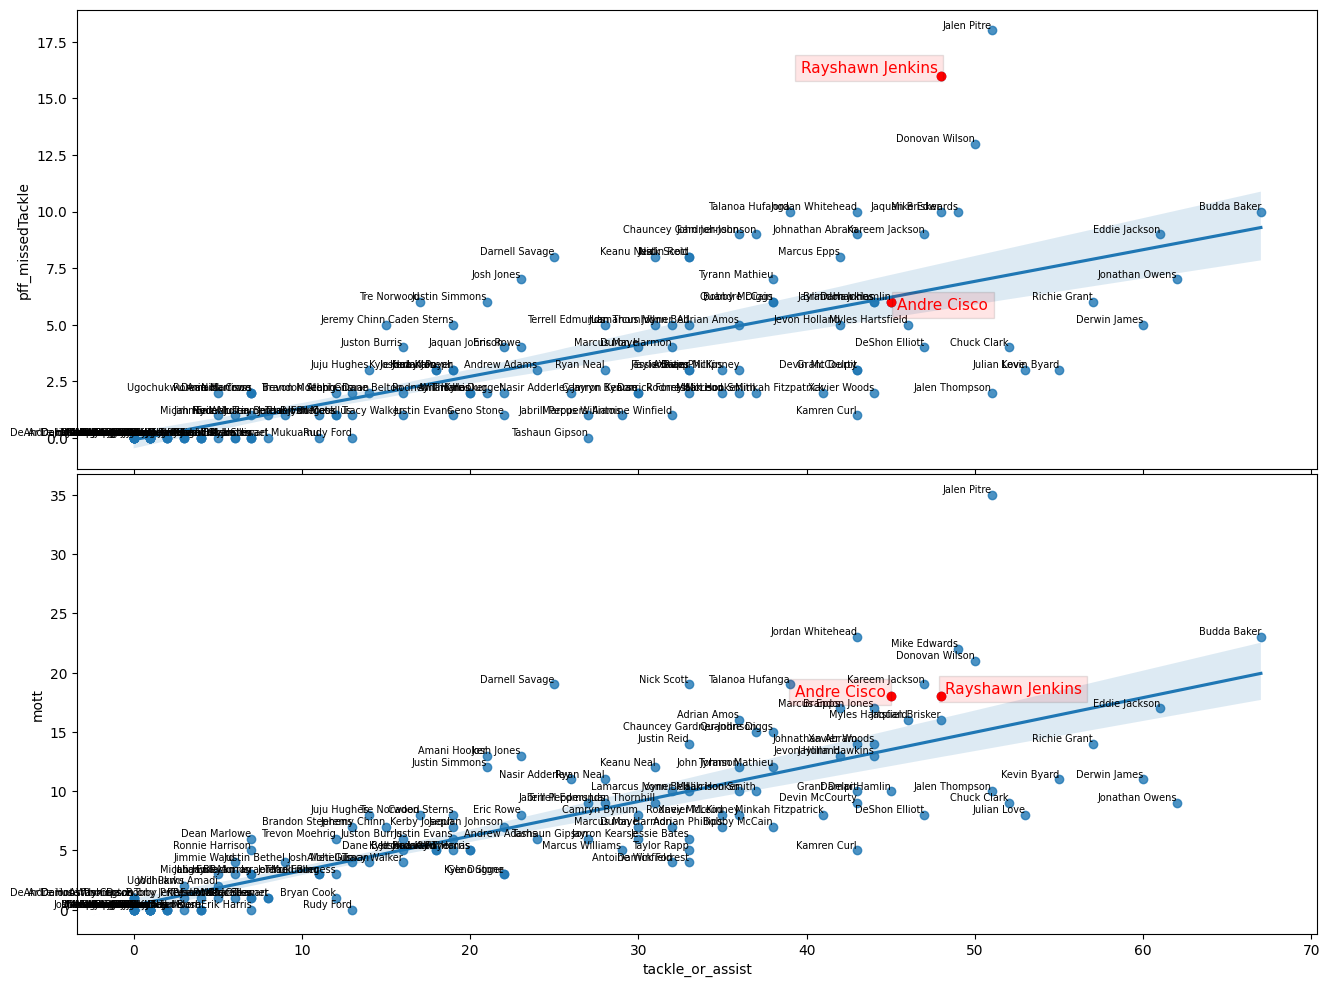

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex="col")

sns.regplot(data=players_statistics[players_statistics["position"].isin(["SS", "FS"])], x="tackle_or_assist", y="pff_missedTackle", ax=axes[0])
axes[0].scatter(
    data=players_statistics[players_statistics["displayName"].isin(["Rayshawn Jenkins", "Andre Cisco"])], 
    x="tackle_or_assist", 
    y="pff_missedTackle",
    color="red",
)
for i, row in players_statistics[players_statistics["position"].isin(["SS", "FS"])].iterrows():
    if row['displayName']=="Rayshawn Jenkins":
        axes[0].text(row['tackle_or_assist']-0.2, row['pff_missedTackle'], row['displayName'], fontsize=11, ha='right', va='bottom', color='red', bbox=dict(facecolor='red', alpha=0.1))
    elif row['displayName']=="Andre Cisco":
        axes[0].text(row['tackle_or_assist']+0.4, row['pff_missedTackle']+0.2, row['displayName'], fontsize=11, ha='left', va='top', color='red', bbox=dict(facecolor='red', alpha=0.1))
    else:
        axes[0].text(row['tackle_or_assist'], row['pff_missedTackle'], row['displayName'], fontsize=7, ha='right', va='bottom')

sns.regplot(data=players_statistics[players_statistics["position"].isin(["SS", "FS"])], x="tackle_or_assist", y="mott", ax=axes[1])
axes[1].scatter(
    data=players_statistics[players_statistics["displayName"].isin(["Rayshawn Jenkins", "Andre Cisco"])], 
    x="tackle_or_assist", 
    y="mott",
    color="red",
)
for i, row in players_statistics[players_statistics["position"].isin(["SS", "FS"])].iterrows():
    if row['displayName']=="Rayshawn Jenkins":
        axes[1].text(row['tackle_or_assist']+0.2, row['mott'], row['displayName'], fontsize=11, ha='left', va='bottom', color='red', bbox=dict(facecolor='red', alpha=0.1))
    elif row['displayName']=="Andre Cisco":
        axes[1].text(row['tackle_or_assist']-0.3, row['mott']-0.3, row['displayName'], fontsize=11, ha='right', va='bottom', color='red', bbox=dict(facecolor='red', alpha=0.1))
    else:
        axes[1].text(row['tackle_or_assist'], row['mott'], row['displayName'], fontsize=7, ha='right', va='bottom')

plt.subplots_adjust(hspace=0.01)
plt.savefig("../reports/figures/safeties_tackling_performances", bbox_inches="tight")

In [19]:
players_statistics[players_statistics["displayName"]=="Rayshawn Jenkins"]

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame,position,displayName,team
nflId,,,,,,,
44926.0,48.0,16.0,18.0,3.573138,SS,Rayshawn Jenkins,JAX


In [31]:
players_statistics[players_statistics["displayName"]=="Andre Cisco"]

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame,position,displayName,team
nflId,,,,,,,
53494.0,45.0,6.0,18.0,2.667048,SS,Andre Cisco,JAX


In [79]:
features_data[(features_data["nflId"]==54513)&(features_data["mott"]==1)]

,gameId,playId,nflId,opportunityId,frameId,ott,mean_distance_to_ball_carrier_from_peak,ball_carrier_distance_won_to_last_frame,tackle_or_assist,pff_missedTackle,mott
3211,2022091102,1162,54513.0,0,47.0,1.198516,1.314719,2.10,0.0,0.0,1.0
3287,2022091102,1562,54513.0,0,47.0,0.475750,6.787381,6.80,0.0,1.0,1.0
3390,2022091102,2065,54513.0,0,50.0,0.934311,3.652979,13.41,0.0,1.0,1.0
3858,2022091102,3859,54513.0,0,12.0,0.651256,2.554641,3.60,0.0,1.0,1.0
27541,2022091812,1302,54513.0,0,41.0,1.323100,2.931027,5.44,0.0,0.0,1.0
27617,2022091812,1603,54513.0,0,38.0,1.508929,3.628384,9.17,0.0,1.0,1.0
27639,2022091812,1645,54513.0,0,10.0,0.382580,4.618480,17.37,0.0,1.0,1.0
27740,2022091812,2033,54513.0,0,44.0,0.787419,10.485488,28.57,0.0,1.0,1.0
28125,2022091812,3298,54513.0,0,40.0,1.907545,3.219501,5.89,0.0,1.0,1.0
32549,2022092501,2585,54513.0,0,52.0,0.730735,1.370730,1.93,0.0,0.0,1.0


In [22]:
players_statistics["position"].value_counts()

position
CB     190
OLB    139
DT     127
DE     125
ILB     90
FS      78
SS      64
NT      31
MLB     11
DB       1
Name: count, dtype: int64

In [116]:
positions_statistics = players_statistics.groupby("position").agg(
    {"tackle_or_assist": "mean", "pff_missedTackle": "mean", "mott": "mean", "ball_carrier_distance_won_to_last_frame": "mean"}
).drop(index="DB")

In [117]:
positions_statistics

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame
position,,,,
CB,15.647368,2.510526,5.136842,3.824173
DE,10.008000,1.464000,5.376000,4.810349
DT,11.598425,1.385827,6.417323,5.058457
FS,20.935897,2.628205,6.320513,2.915537
ILB,31.033333,3.477778,9.366667,3.459077
MLB,19.727273,2.000000,5.727273,3.753258
NT,13.064516,1.290323,8.612903,5.056047
OLB,15.043165,2.266187,6.510791,4.607573
SS,24.906250,3.671875,7.843750,3.125177


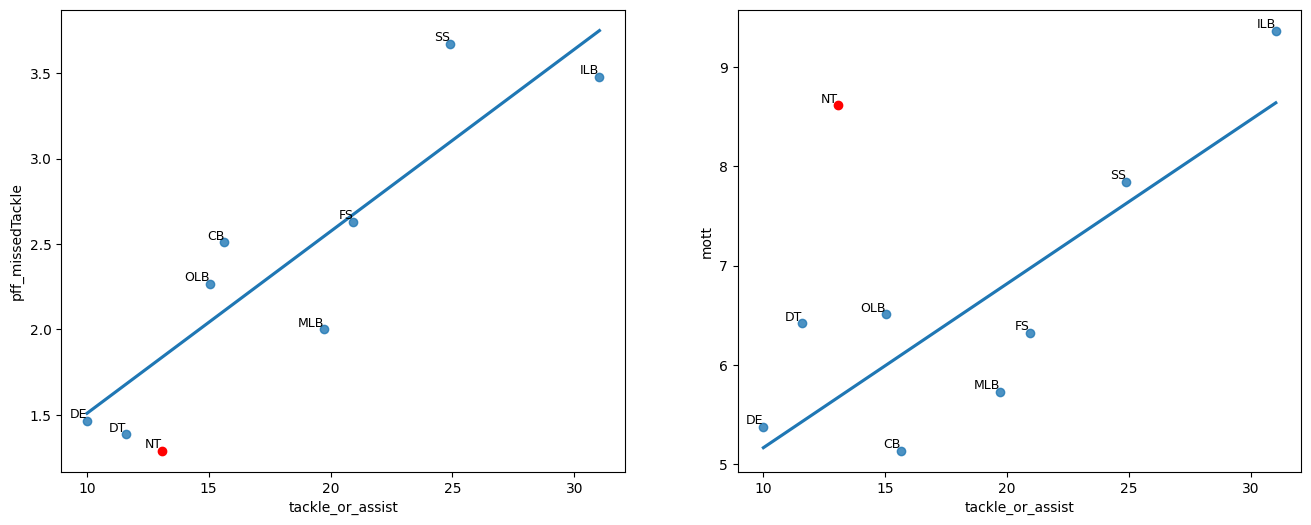

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(data=positions_statistics.drop(index="NT"), x="tackle_or_assist", y="pff_missedTackle", ci=None, ax=axes[0])
axes[0].scatter(
    data=positions_statistics.loc["NT"], 
    x="tackle_or_assist", 
    y="pff_missedTackle",
    color="red",
)
for i, row in positions_statistics.iterrows():
    axes[0].text(row['tackle_or_assist'], row['pff_missedTackle'], i, fontsize=9, ha='right', va='bottom')

sns.regplot(data=positions_statistics.drop(index="NT"), x="tackle_or_assist", y="mott", ci=None, ax=axes[1])
axes[1].scatter(
    data=positions_statistics.loc["NT"], 
    x="tackle_or_assist", 
    y="mott",
    color="red",
)
for i, row in positions_statistics.iterrows():
    axes[1].text(row['tackle_or_assist'], row['mott'], i, fontsize=9, ha='right', va='bottom')

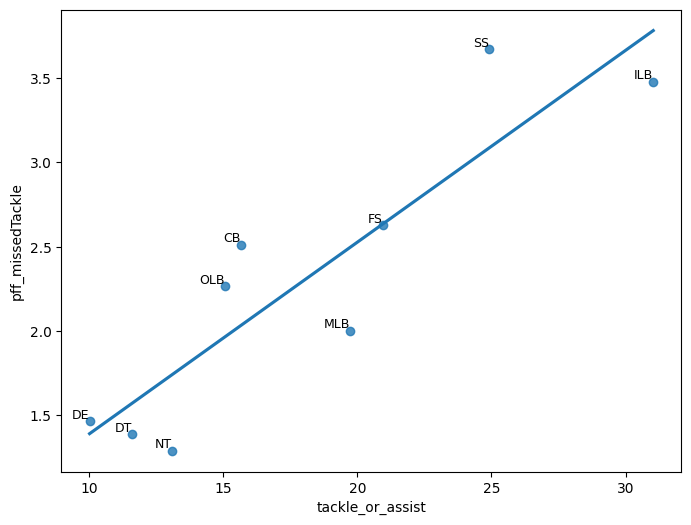

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(data=positions_statistics, x="tackle_or_assist", y="pff_missedTackle", ci=None)
for i, row in positions_statistics.iterrows():
    ax.text(row['tackle_or_assist'], row['pff_missedTackle'], i, fontsize=9, ha='right', va='bottom')

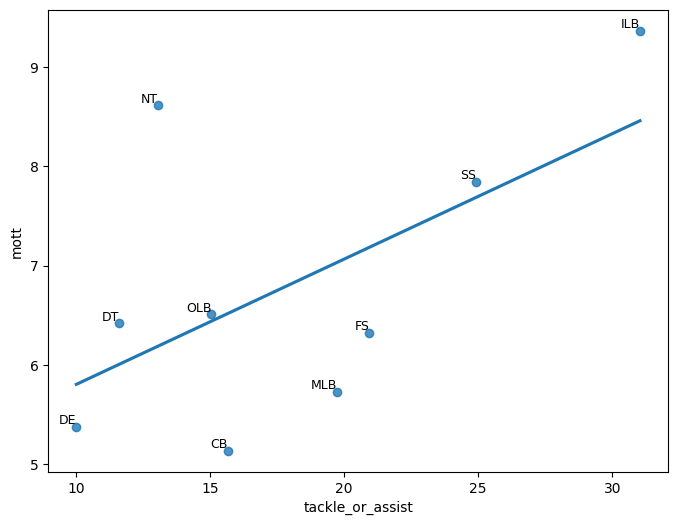

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(data=positions_statistics, x="tackle_or_assist", y="mott", ci=None)
for i, row in positions_statistics.iterrows():
    ax.text(row['tackle_or_assist'], row['mott'], i, fontsize=9, ha='right', va='bottom')

In [27]:
players_statistics[players_statistics["position"]=="NT"]

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame,position,displayName,team
nflId,,,,,,,
35449.0,8.0,1.0,4.0,5.197025,NT,Tyson Alualu,PIT
35562.0,22.0,1.0,10.0,5.721656,NT,Al Woods,SEA
39997.0,12.0,1.0,8.0,4.898532,NT,Johnathan Hankins,LV/DAL
40030.0,8.0,0.0,2.0,3.322941,NT,John Jenkins,MIA
40347.0,22.0,2.0,15.0,5.353295,NT,Mike Purcell,DEN
41595.0,11.0,1.0,7.0,5.503047,NT,Mike Pennel,CHI
42433.0,5.0,2.0,9.0,4.651683,NT,Carl Davis,NE
42559.0,7.0,1.0,8.0,5.455522,NT,Christian Covington,LAC
42560.0,16.0,1.0,7.0,5.227681,NT,Rakeem Nunez-Roches,TB


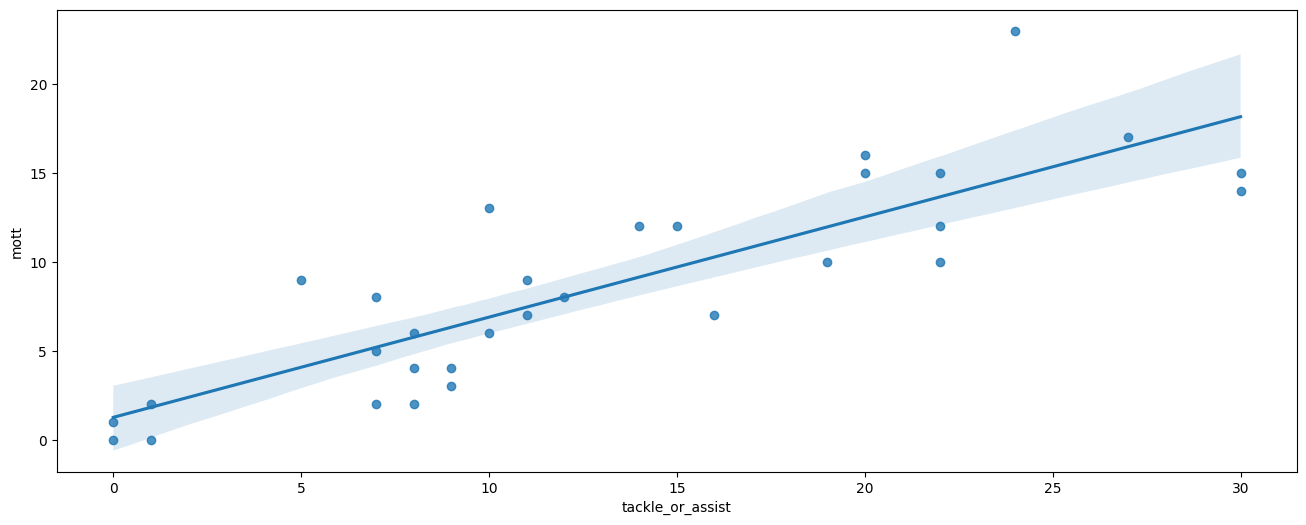

In [28]:
plt.figure(figsize=(16, 6))
ax = sns.regplot(data=players_statistics[players_statistics["position"]=="NT"], x="tackle_or_assist", y="mott")

In [82]:
features_data[(features_data["nflId"]==43332)&(features_data["mott"]==1)]

,gameId,playId,nflId,opportunityId,ott,mean_distance_to_ball_carrier_from_peak,ball_carrier_distance_won_to_last_frame,tackle_or_assist,pff_missedTackle,mott
12195,2022091111,1172,43332.0,0,0.409140,1.839113,3.18,0.0,0.0,1.0
12321,2022091111,1706,43332.0,0,1.712178,3.913150,1.80,0.0,1.0,1.0
15634,2022091500,1431,43332.0,0,1.168515,1.994531,0.00,0.0,0.0,1.0
15892,2022091500,2530,43332.0,0,1.309916,2.775428,0.00,0.0,0.0,1.0
39915,2022092509,950,43332.0,0,1.078277,2.110014,4.18,0.0,1.0,1.0
40114,2022092509,1848,43332.0,0,0.342845,6.104605,11.24,0.0,0.0,1.0
40512,2022092509,3454,43332.0,0,1.225807,5.662456,6.90,0.0,1.0,1.0
40526,2022092509,3475,43332.0,0,0.280122,3.211072,11.48,0.0,0.0,1.0
52177,2022100206,568,43332.0,0,1.079800,2.205498,0.00,0.0,0.0,1.0
63493,2022100902,601,43332.0,0,0.603712,1.693737,2.06,0.0,0.0,1.0


In [9]:
games = pd.read_csv("../data/games.csv")

In [10]:
games["homeWin"] = (games["homeFinalScore"]>games["visitorFinalScore"]).astype(int)
games["visitorWin"] = (games["homeFinalScore"]<games["visitorFinalScore"]).astype(int)

In [11]:
pd.melt(
    games, 
    id_vars=["gameId", "homeFinalScore", "visitorFinalScore", "homeWin", "visitorWin"], 
    value_vars=["homeTeamAbbr", "visitorTeamAbbr"], 
    var_name="side",
    value_name="team"
).set_index(["gameId", "team"])

,,homeFinalScore,visitorFinalScore,homeWin,visitorWin,side
gameId,team,,,,,
2022090800,LA,10,31,0,1,homeTeamAbbr
2022091100,ATL,26,27,0,1,homeTeamAbbr
2022091101,CAR,24,26,0,1,homeTeamAbbr
2022091102,CHI,19,10,1,0,homeTeamAbbr
2022091103,CIN,20,23,0,1,homeTeamAbbr
...,...,...,...,...,...,...
2022110607,MIN,17,20,0,1,visitorTeamAbbr
2022110608,SEA,21,31,0,1,visitorTeamAbbr
2022110609,LA,16,13,1,0,visitorTeamAbbr


In [13]:
teams_statistics = result_data.reset_index().merge(
    visualization_tracking_data[visualization_tracking_data["is_defense"]][["gameId", "playId", "defensiveTeam"]].drop_duplicates(),
    on = ["gameId", "playId"],
)

In [14]:
games_teams_statistics = teams_statistics.groupby(["gameId", "defensiveTeam", "playId"]).agg(
    {"tackle_or_assist": "sum", "pff_missedTackle": "sum", "mott": "sum", "ball_carrier_distance_won_to_last_frame": "max"}
)
games_teams_statistics = games_teams_statistics.reset_index().groupby(["gameId", "defensiveTeam"]).agg(
    {"tackle_or_assist": "sum", "pff_missedTackle": "sum", "mott": "sum", "ball_carrier_distance_won_to_last_frame": "sum"}
)

In [15]:
games_teams_statistics

tackle_or_assist  pff_missedTackle  mott  \
gameId     defensiveTeam                                             
2022090800 BUF                        54.0               3.0  14.0   
           LA                         54.0               5.0  18.0   
2022091100 ATL                        53.0               8.0  19.0   
           NO                         67.0               5.0  19.0   
2022091101 CAR                        68.0              17.0  38.0   
...                                    ...               ...   ...   
2022110609 TB                         41.0               3.0  10.0   
2022110610 KC                         42.0               8.0  17.0   
           TEN                        74.0              10.0  17.0   
2022110700 BAL                        26.0               1.0   6.0   
           NO                         54.0               9.0  27.0   

                          ball_carrier_distance_won_to_last_frame  
gameId     defensiveTeam                                           
2022090800 BUF                                             212.55  
           LA                                              311.45  
2022091100 ATL                                             312.65  
           NO                                              440.10  
2022091101 CAR                                             431.13  
...                                                           ...  
2022110609 TB                                              190.91  
2022110610 KC                                              355.62  
           TEN                                             347.14  
2022110700 BAL                                             166.52  
           NO                                              465.75  

[271 rows x 4 columns]

In [26]:
teams_statistics = teams_statistics.groupby("defensiveTeam").agg(
    {"tackle_or_assist": "sum", "pff_missedTackle": "sum", "mott": "sum", "ball_carrier_distance_won_to_last_frame": "mean"}
)

In [27]:
teams_statistics

,tackle_or_assist,pff_missedTackle,mott,ball_carrier_distance_won_to_last_frame
defensiveTeam,,,,
ARI,500.0,69.0,200.0,4.323618
ATL,540.0,71.0,190.0,3.489667
BAL,430.0,59.0,168.0,3.733323
BUF,412.0,63.0,169.0,3.813084
CAR,532.0,74.0,233.0,4.104979
CHI,478.0,72.0,197.0,4.470230
CIN,439.0,48.0,153.0,3.930137
CLE,366.0,59.0,156.0,4.921690
DAL,445.0,54.0,159.0,4.142238


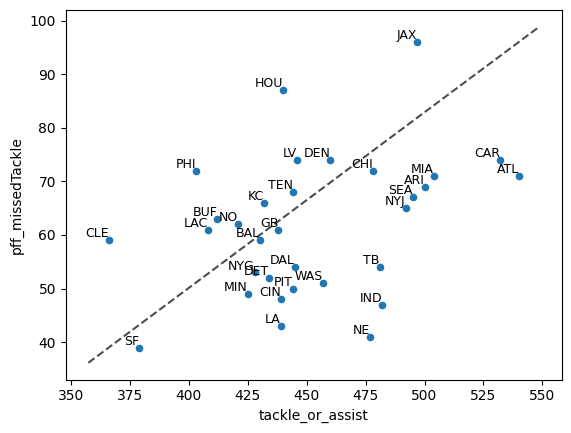

In [28]:
ax = teams_statistics.plot(x="tackle_or_assist", y="pff_missedTackle", kind="scatter")
for i, row in teams_statistics.iterrows():
    ax.text(row['tackle_or_assist'], row['pff_missedTackle'], i, fontsize=9, ha='right', va='bottom')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

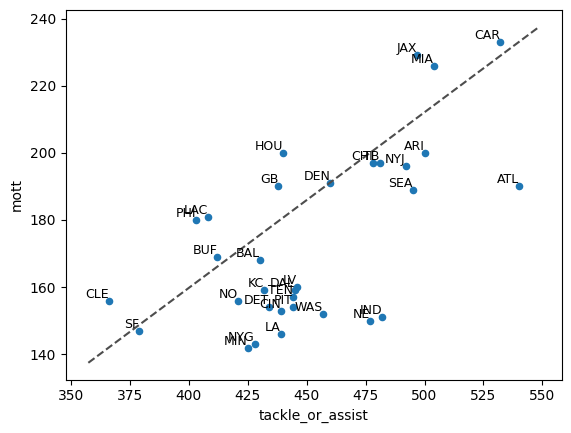

In [29]:
ax = teams_statistics.plot(x="tackle_or_assist", y="mott", kind="scatter")
for i, row in teams_statistics.iterrows():
    ax.text(row['tackle_or_assist'], row['mott'], i, fontsize=9, ha='right', va='bottom')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")